<a href="https://colab.research.google.com/github/liennna/streamlit-example/blob/master/%D0%9A%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%812_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Конкурс 2</h1>
<b><p style="color:#333;"></p>

<h1>Подключаем библиотеки</h1>

In [ ]:
# все библиотеки должны быть в одной ячейке
import pandas as pd
import numpy as np


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats


from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

import matplotlib.backends.backend_pdf as pdf_backend


In [ ]:
!pip install category_encoders -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

<h1>Грузим датасет</h1>

In [ ]:
# Читаем данные из файла
data = pd.read_csv('sample_submission.csv')
data.tail(3)

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
3497,3497,9.95,8.367,8.433,8.770,6.170,5.80,10.400,7.20,0.430,...,20.05,1.44,1.800,4.867,4.833,4.725,4.95,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.29,8.980,2.31,0.300,...,20.05,9.53,7.695,10.700,5.400,4.725,3.30,6.750,6.625,5.00
3499,3499,8.51,8.500,8.100,9.545,9.265,8.11,9.805,7.15,0.215,...,3.07,1.73,1.800,1.720,2.520,2.040,2.04,8.415,2.950,2.27


<h1>EDA</h1>

In [ ]:
# Выводим количество столбцов и строк
num_columns = data.shape[1]
num_rows = data.shape[0]
print("Количество столбцов:", num_columns)
print("Количество строк:", num_rows)

Количество столбцов: 37
Количество строк: 3500


In [ ]:
# Выводим объем памяти
memory_usage = data.memory_usage().sum() / 1024 / 1024 # в мегабайтах
print("Объем памяти:", memory_usage, "MB")

Объем памяти: 0.988128662109375 MB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3500 non-null   int64  
 1   target  3500 non-null   float64
 2   O2_1    3500 non-null   float64
 3   O2_2    3500 non-null   float64
 4   O2_3    3500 non-null   float64
 5   O2_4    3500 non-null   float64
 6   O2_5    3500 non-null   float64
 7   O2_6    3500 non-null   float64
 8   O2_7    3500 non-null   float64
 9   NH4_1   3500 non-null   float64
 10  NH4_2   3500 non-null   float64
 11  NH4_3   3500 non-null   float64
 12  NH4_4   3500 non-null   float64
 13  NH4_5   3500 non-null   float64
 14  NH4_6   3500 non-null   float64
 15  NH4_7   3500 non-null   float64
 16  NO2_1   3500 non-null   float64
 17  NO2_2   3500 non-null   float64
 18  NO2_3   3500 non-null   float64
 19  NO2_4   3500 non-null   float64
 20  NO2_5   3500 non-null   float64
 21  NO2_6   3500 non-null   float64
 22  

In [ ]:
data.nunique()

id        3500
target     462
O2_1       329
O2_2       258
O2_3       235
O2_4       241
O2_5       317
O2_6       238
O2_7       303
NH4_1      152
NH4_2      157
NH4_3      120
NH4_4      366
NH4_5      397
NH4_6       80
NH4_7       84
NO2_1      116
NO2_2      113
NO2_3       75
NO2_4       90
NO2_5      190
NO2_6       79
NO2_7      103
NO3_1      301
NO3_2      265
NO3_3      270
NO3_4      366
NO3_5      411
NO3_6      265
NO3_7      249
BOD5_1     297
BOD5_2     252
BOD5_3     209
BOD5_4     259
BOD5_5     255
BOD5_6     282
BOD5_7      32
dtype: int64

<h2>Подсчет общего количества пропущенных значений (NaN) в каждом столбце данных data. </h2>

In [ ]:
data.isnull().sum()

id        0
target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Length: 3500, dtype: bool

<h2>Корреляционная матрица </h2>

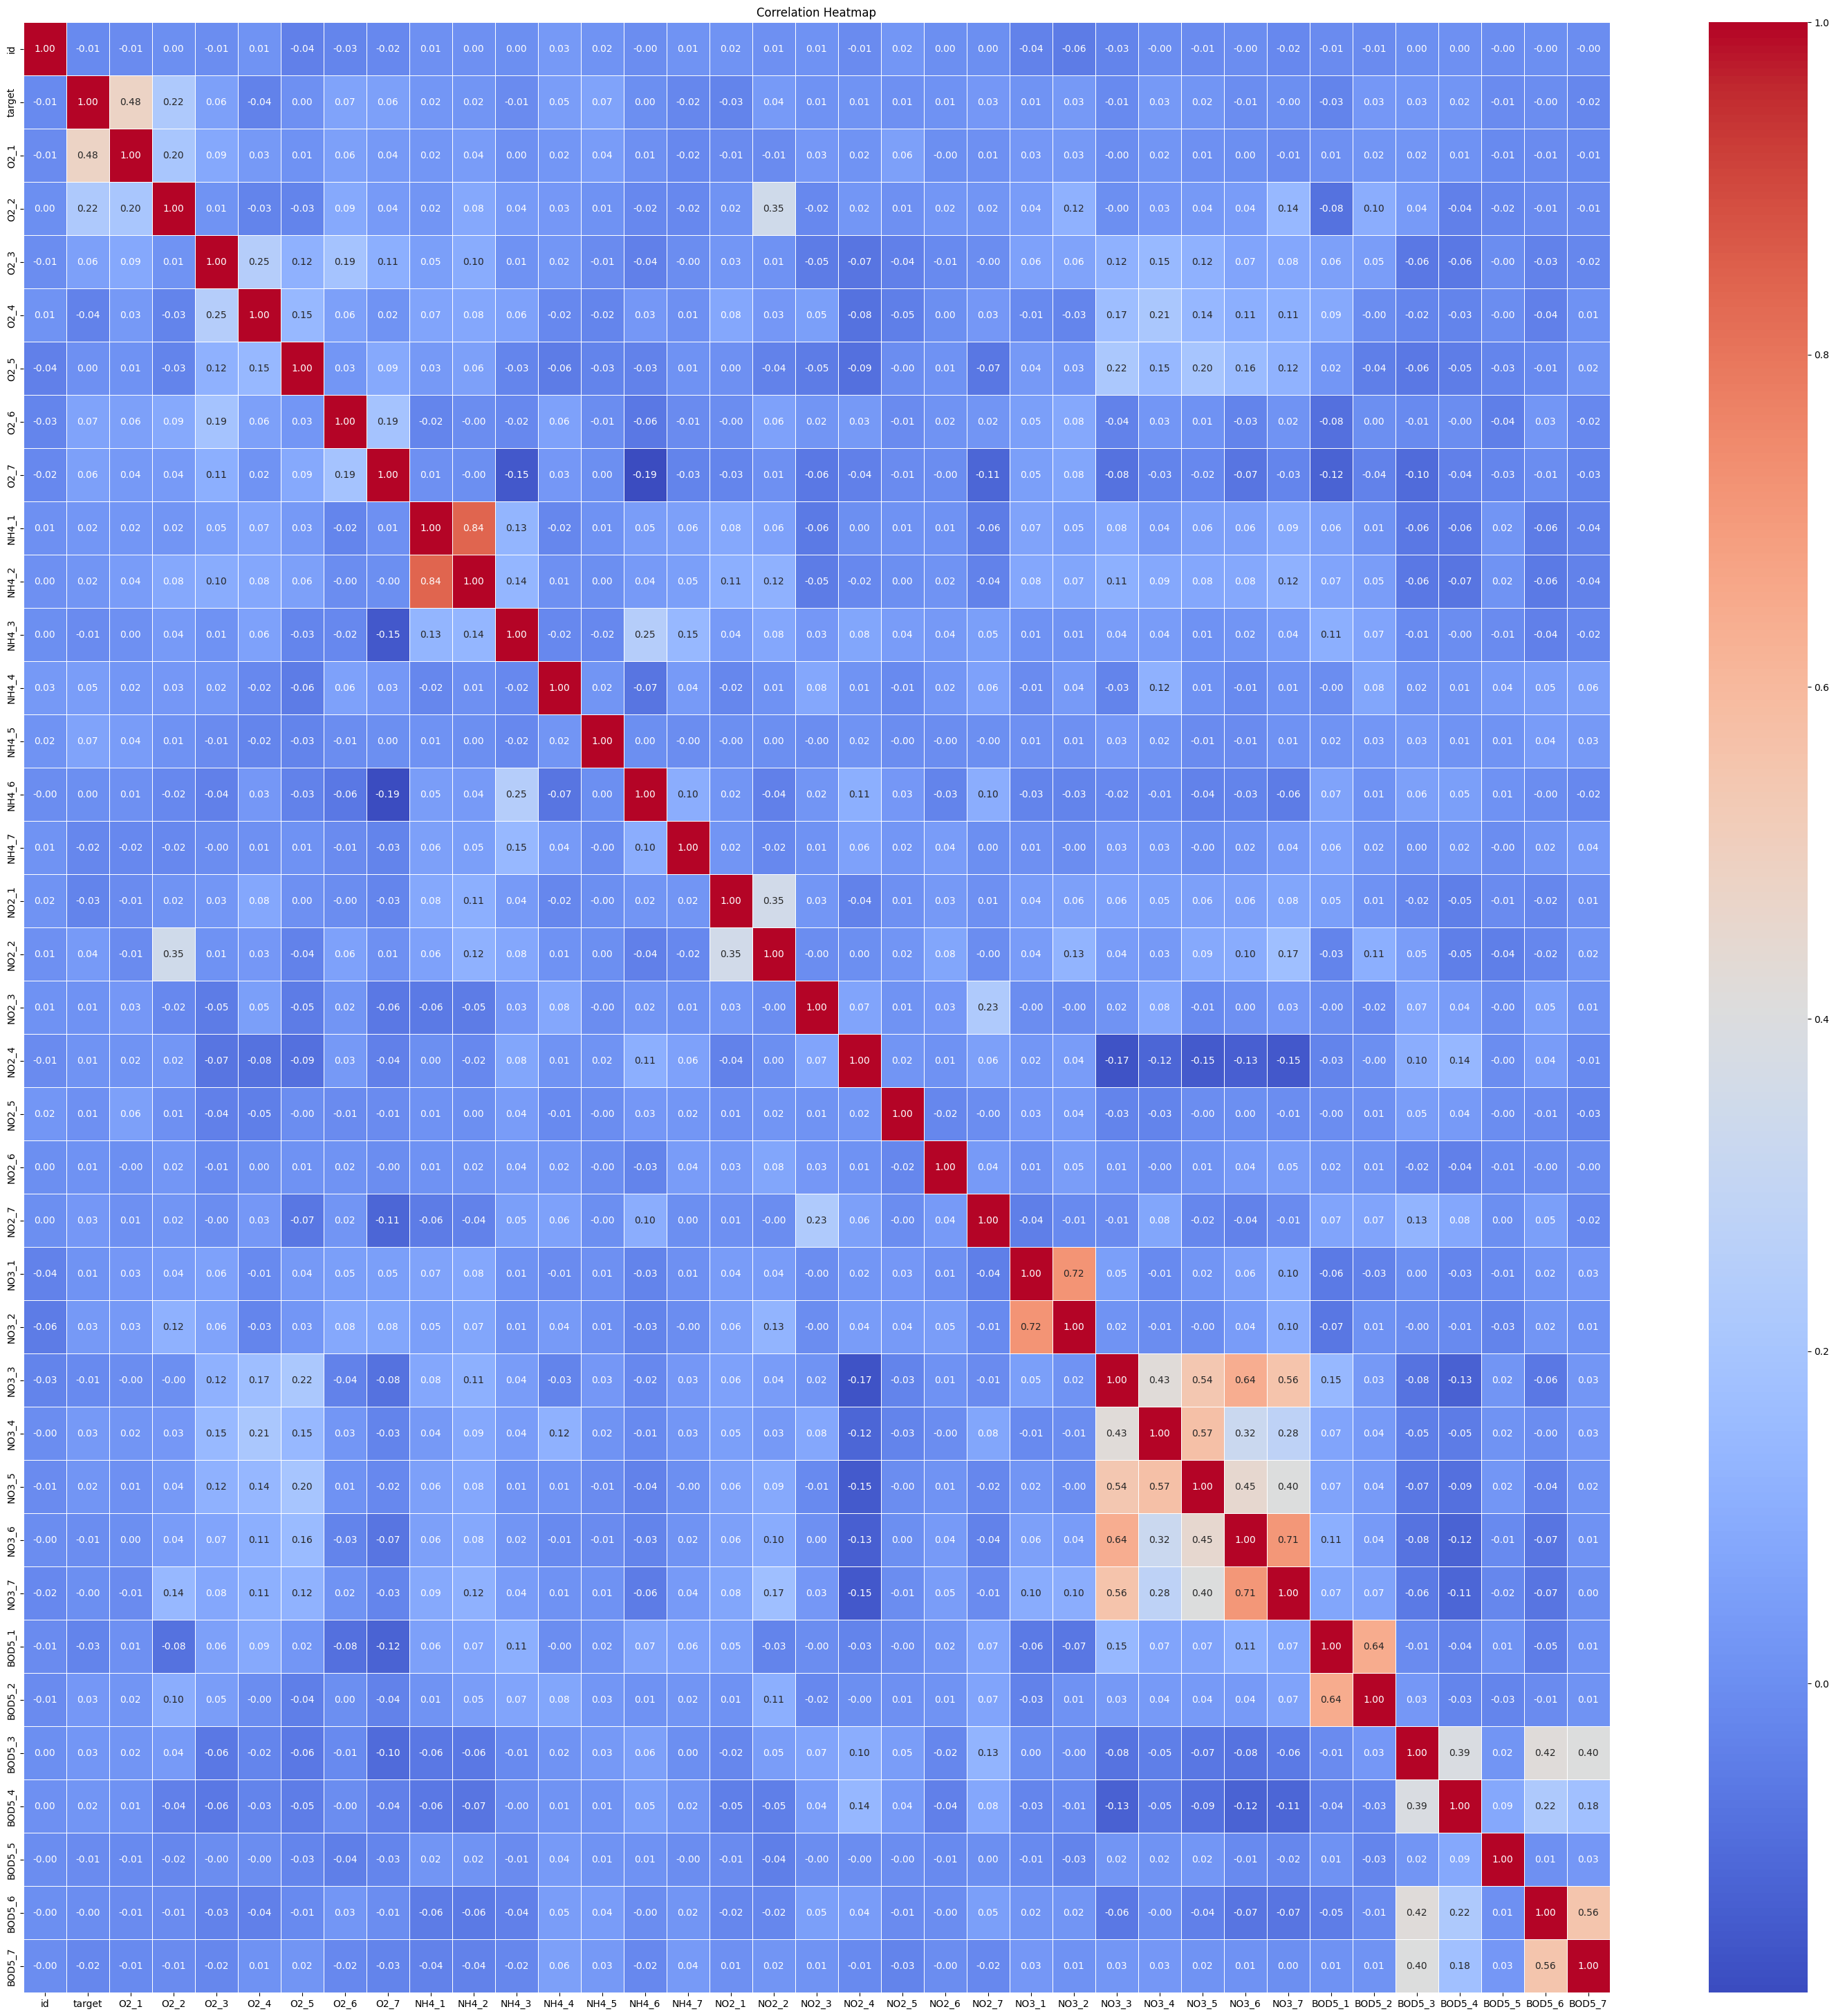

In [ ]:
# Построим матрицу корреляций
plt.figure(figsize=(37, 37))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df = data.drop(["id"],axis=1)

<h2>Для каждой интервальной переменной подсчитать следующее -
мин, медиана, среднее, макс и персентили 25, 75 </h2>

In [ ]:
df.describe()

,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,0.397956,...,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,0.452237,...,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,...,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,0.200000,...,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,0.245000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,0.405000,...,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,...,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


<h2>Функции для анализа данных </h2>

In [ ]:
def analyze_outliers(df, col):
  # найдем с помощью IQR
  Q3 = np.quantile(df[col], 0.75, axis=0)
  Q1 = np.quantile(df[col], 0.25, axis=0)
  IQR = Q3 - Q1
  upper = round(Q3 + 1.5 * IQR, 2)
  lower = round(Q1 - 1.5 * IQR, 2)
  if round(Q1 - 1.5 * IQR, 2)<0:
    lower = 0
  print('____________________________________________________________________')
  print(f'интервал фактических значений для переменной {col} от {round(df[col].min(),2)} до {round(df[col].max(),2)}')
  print(f'интервал нормальных значений для переменной {col} от {lower} до {upper}')

  print(f'переменная {col} содержит аномальных значений : {round(df[(df[col]>upper)| (df[col]<lower)].shape[0]/df.shape[0]*100, 2)}%')

  if df[(df[col] == 0)].shape[0]>0:
    print(f'переменная {col} содержит нулевые значения {round(df[(df[col] == 0)].shape[0]/df.shape[0]*100, 2)}%')

  return lower, upper

In [ ]:
def get_charts(df, col):
  print(f'распределение для переменной {col}')
  print('____________________________________________________________________')

  f, ax = plt.subplots(1, 2, figsize=(10, 5))
  sns.boxplot(data=df, y=col, ax=ax[0])
  ax[0].set_title(f'{col} Distribution')

  sns.histplot(data=df, x=col, ax=ax[1])
  ax[1].set_title(f'{col} Distribution')
  plt.show()

<h2>Анализируем выбросы </h2>

In [ ]:
for col in df:
    analyze_outliers(df, col)

____________________________________________________________________
интервал фактических значений для переменной target от 1.3 до 65.93
интервал нормальных значений для переменной target от 5.01 до 11.57
переменная target содержит аномальных значений : 3.49%
____________________________________________________________________
интервал фактических значений для переменной O2_1 от 0.0 до 46.95
интервал нормальных значений для переменной O2_1 от 4.1 до 12.1
переменная O2_1 содержит аномальных значений : 3.26%
переменная O2_1 содержит нулевые значения 0.03%
____________________________________________________________________
интервал фактических значений для переменной O2_2 от 0.0 до 65.95
интервал нормальных значений для переменной O2_2 от 5.2 до 10.8
переменная O2_2 содержит аномальных значений : 15.11%
переменная O2_2 содержит нулевые значения 0.03%
____________________________________________________________________
интервал фактических значений для переменной O2_3 от 4.9 до 16.9
интер

In [ ]:
target = 'target' # столбец с целевой переменной

In [ ]:
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
print("\n Статистика по столбцам:")
X.describe().T


 Статистика по столбцам:


,count,mean,std,min,25%,50%,75%,max
O2_1,3500.0,8.216993,3.040743,0.000,7.1000,7.890,9.1000,46.950
O2_2,3500.0,9.291581,6.817822,0.000,7.3000,8.300,8.7000,65.950
O2_3,3500.0,9.633064,1.439039,4.900,8.7700,9.500,9.5450,16.900
O2_4,3500.0,8.065733,1.463881,2.300,6.8300,7.980,9.2650,21.800
O2_5,3500.0,5.671581,2.721399,0.200,4.5500,5.800,7.0150,59.400
O2_6,3500.0,9.461363,1.140365,0.000,8.9800,9.430,10.0700,40.190
O2_7,3500.0,6.547433,1.663266,0.000,5.8775,6.430,7.1500,15.900
NH4_1,3500.0,0.340525,0.284751,0.020,0.2145,0.247,0.3700,4.200
NH4_2,3500.0,0.397956,0.452237,0.020,0.2000,0.245,0.4050,3.600
NH4_3,3500.0,1.036098,0.595943,0.120,0.6500,0.698,1.6400,14.515


<h2>Рисуем графики, смотрим на выбросы, на распределение переменных </h2>

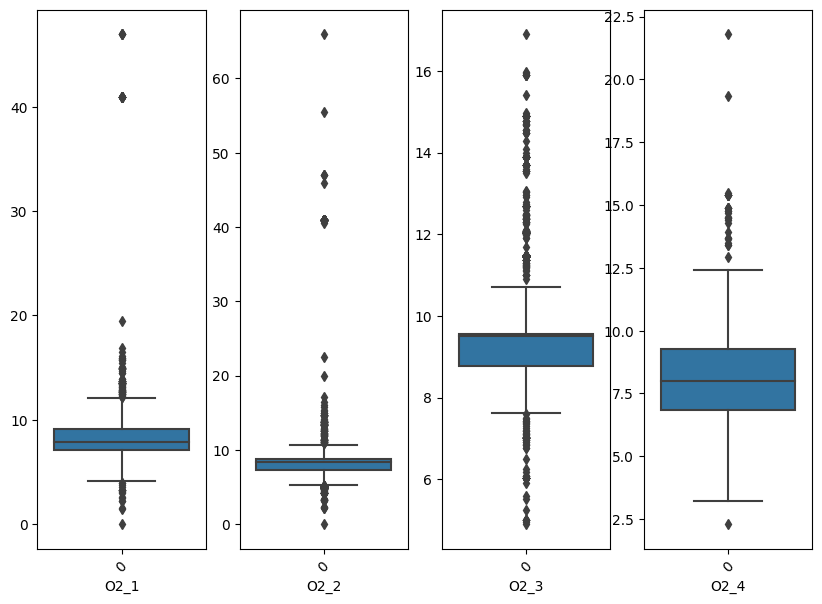

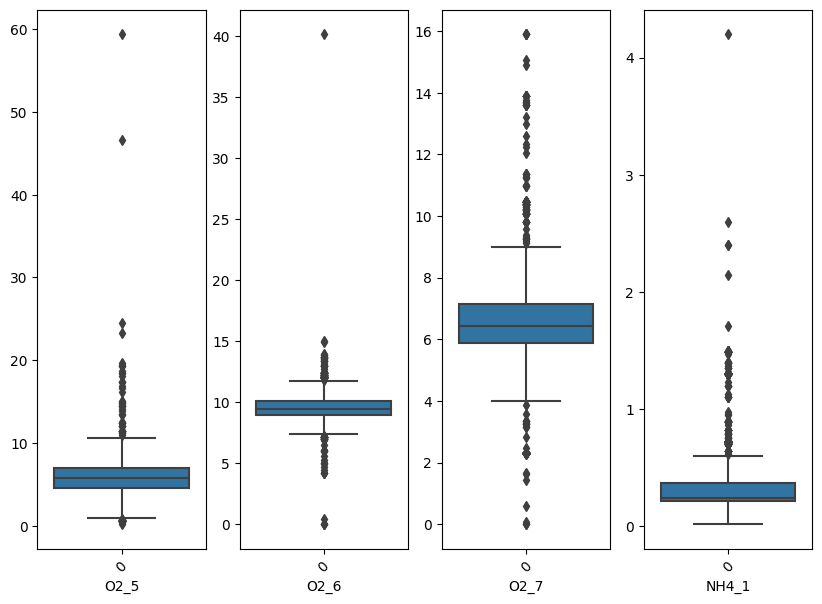

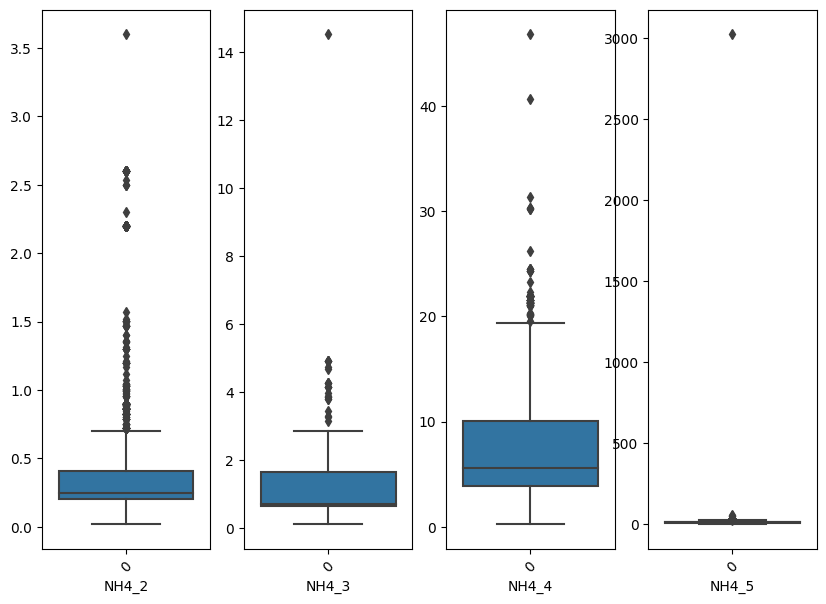

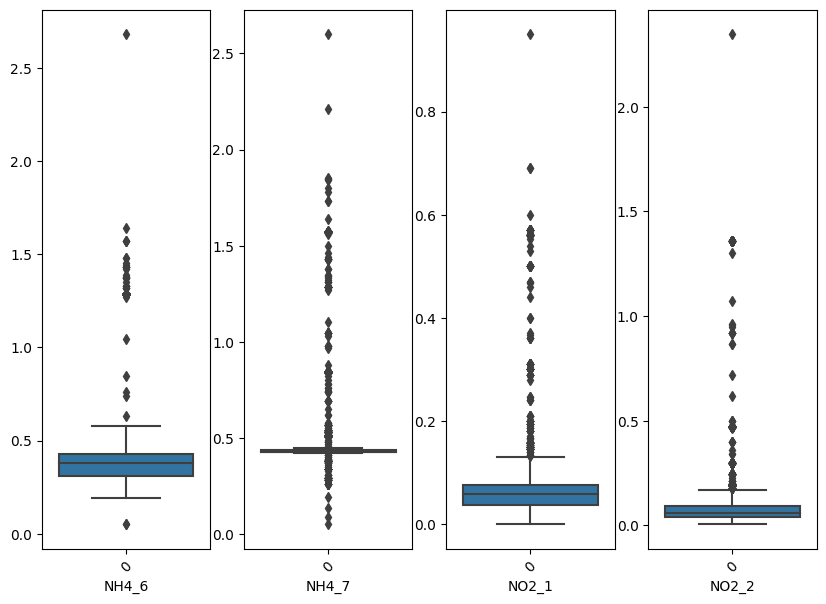

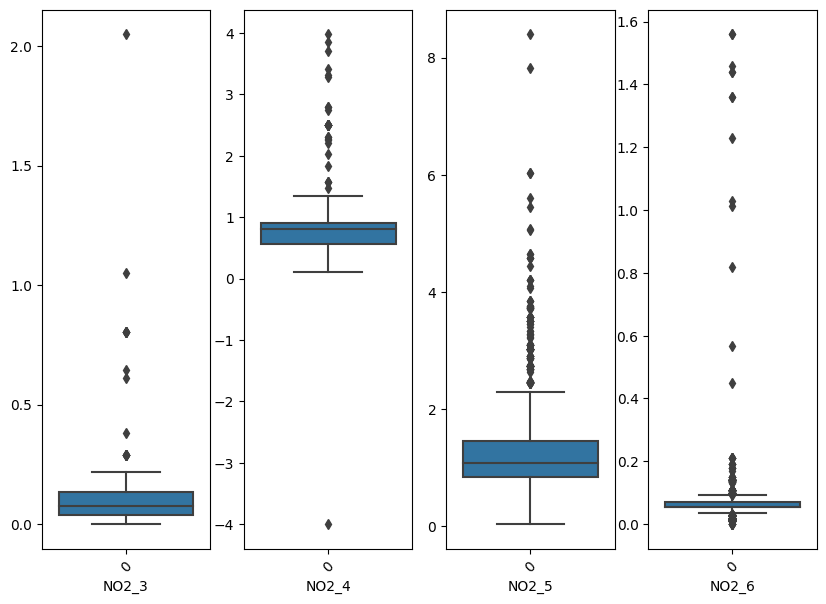

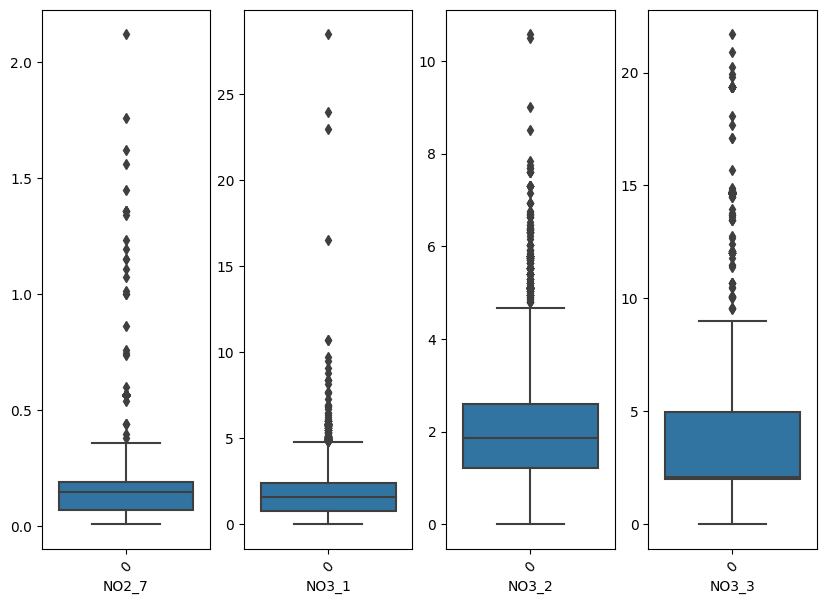

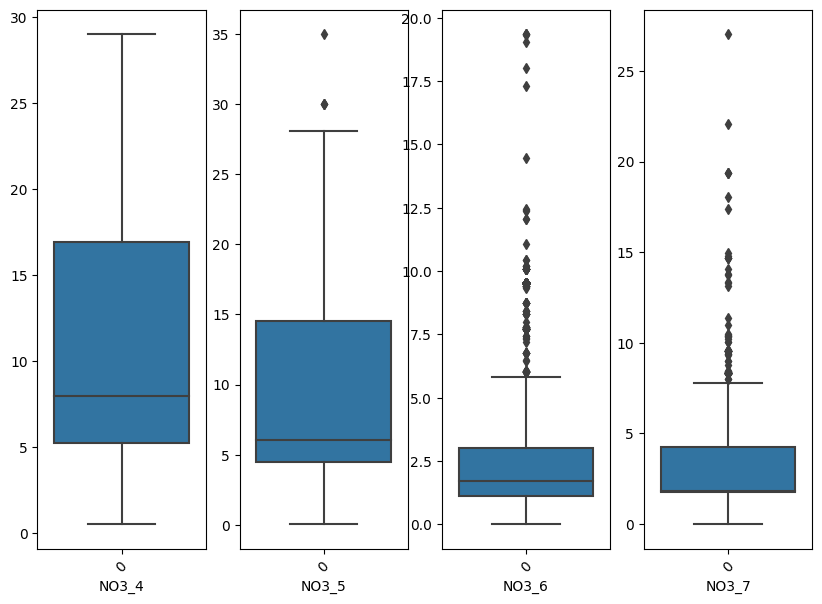

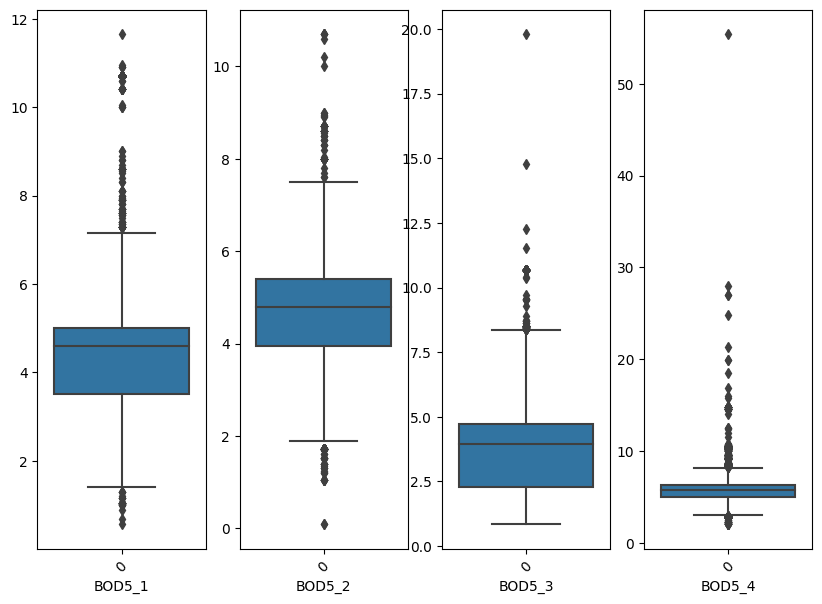

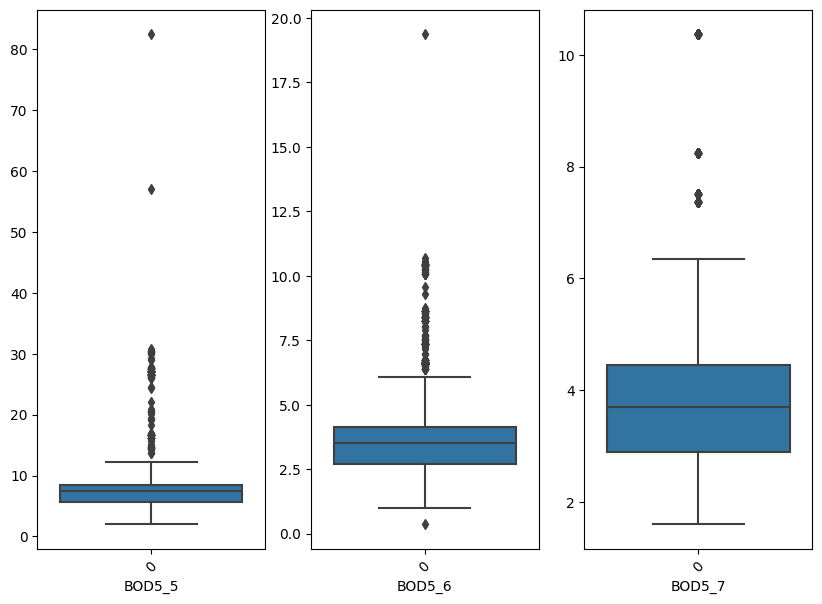

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Делим 8 столбцов на 2 окна по 4 графика в каждом окне
num_windows = 2
num_plots_per_window = 4

# Разделяем столбцы на группы по 5
groups = [X.columns[i:i+num_plots_per_window] for i in range(0, len(X.columns), num_plots_per_window)]

# Создаем каждое окно с 5 графиками
for group in groups:
    plt.figure(figsize=(10, 7))

    # Строим графики для каждого столбца в текущей группе
    for i, column in enumerate(group):
        plt.subplot(1, len(group), i + 1)
        sns.boxplot(data=X[column])
        plt.xticks(rotation=45)
        plt.xlabel(column)

    # Отображаем текущее окно
    plt.show()

<h1>Общий вывод</h1>
<h2>



 </h2>

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O2_1    3500 non-null   float64
 1   O2_2    3500 non-null   float64
 2   O2_3    3500 non-null   float64
 3   O2_4    3500 non-null   float64
 4   O2_5    3500 non-null   float64
 5   O2_6    3500 non-null   float64
 6   O2_7    3500 non-null   float64
 7   NH4_1   3500 non-null   float64
 8   NH4_2   3500 non-null   float64
 9   NH4_3   3500 non-null   float64
 10  NH4_4   3500 non-null   float64
 11  NH4_5   3500 non-null   float64
 12  NH4_6   3500 non-null   float64
 13  NH4_7   3500 non-null   float64
 14  NO2_1   3500 non-null   float64
 15  NO2_2   3500 non-null   float64
 16  NO2_3   3500 non-null   float64
 17  NO2_4   3500 non-null   float64
 18  NO2_5   3500 non-null   float64
 19  NO2_6   3500 non-null   float64
 20  NO2_7   3500 non-null   float64
 21  NO3_1   3500 non-null   float64
 22  

<h1>Разбиваем данные на train и test</h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((2800, 35), (700, 35))

In [ ]:
y_train

162     12.70
1001     8.11
1718     9.29
1003     9.12
1233     7.42
        ...  
1095     7.10
1130     7.38
1294     8.62
860      7.19
3174     8.42
Name: target, Length: 2800, dtype: float64

# Подготовка данных для построения модели МО

<h1>Выбросов в числовых переменных мало, но все таки удалим их и запишем в другую переменную результат, вдруг пригодится</h1>

In [ ]:
X_copy=X.copy()

In [ ]:
X_copy

,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,0.200,0.650,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,1.027,1.848,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,0.020,0.650,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,0.270,1.730,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,0.435,0.650,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,0.565,3.960,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,2.200,1.640,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,0.400,1.848,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,0.200,1.160,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [ ]:
#удаление выбросов и замена их медианными значениями
def remove_outliers_replace_with_median(df):
    # Перебираем все столбцы датафрейма
    for col in df.columns:
        # Вычисляем Q1, Q3 и IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Определяем границы выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Заменяем выбросы медианными значениями
        median = df[col].median()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median
    return df



In [ ]:
X_cleaned = remove_outliers_replace_with_median(X_copy)

<h1>Проверяем, что выбросы удалились</h1>

In [ ]:
for col in X_cleaned:
    analyze_outliers(X_cleaned,col)

____________________________________________________________________
интервал фактических значений для переменной O2_1 от 4.1 до 12.1
интервал нормальных значений для переменной O2_1 от 4.1 до 12.1
переменная O2_1 содержит аномальных значений : 0.0%
____________________________________________________________________
интервал фактических значений для переменной O2_2 от 5.27 до 10.7
интервал нормальных значений для переменной O2_2 от 6.5 до 9.7
переменная O2_2 содержит аномальных значений : 8.11%
____________________________________________________________________
интервал фактических значений для переменной O2_3 от 7.62 до 10.7
интервал нормальных значений для переменной O2_3 от 8.13 до 10.39
переменная O2_3 содержит аномальных значений : 9.74%
____________________________________________________________________
интервал фактических значений для переменной O2_4 от 3.24 до 12.4
интервал нормальных значений для переменной O2_4 от 3.22 до 12.88
переменная O2_4 содержит аномальных значений

In [ ]:
X_cleaned.shape

(3500, 35)

In [ ]:
nan_count = df.isna().sum().sum()

In [ ]:
nan_count

0

In [ ]:
def remove_outliers_replace_with_mean(df):
    # Перебираем все столбцы датафрейма
    for col in df.columns:
        # Вычисляем Q1, Q3 и IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Определяем границы выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Заменяем выбросы средними значениями
        mean = df[col].mean()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mean
    return df

In [ ]:
X_cleaned_mean = remove_outliers_replace_with_mean(X_copy)

In [ ]:
X_cleaned_mean.shape

(3500, 35)

In [ ]:
for col in X_cleaned_mean:
    analyze_outliers(X_cleaned_mean,col)

____________________________________________________________________
интервал фактических значений для переменной O2_1 от 4.1 до 12.1
интервал нормальных значений для переменной O2_1 от 4.1 до 12.1
переменная O2_1 содержит аномальных значений : 0.0%
____________________________________________________________________
интервал фактических значений для переменной O2_2 от 6.5 до 9.7
интервал нормальных значений для переменной O2_2 от 7.5 до 9.1
переменная O2_2 содержит аномальных значений : 17.66%
____________________________________________________________________
интервал фактических значений для переменной O2_3 от 8.17 до 10.38
интервал нормальных значений для переменной O2_3 от 8.68 до 10.06
переменная O2_3 содержит аномальных значений : 6.91%
____________________________________________________________________
интервал фактических значений для переменной O2_4 от 3.24 до 12.4
интервал нормальных значений для переменной O2_4 от 3.22 до 12.88
переменная O2_4 содержит аномальных значений

In [ ]:
def remove_outliers_z_score(df):
    from scipy import stats
    z_scores = stats.zscore(df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores <3).all(axis=1)
    return df[filtered_entries]

In [ ]:
X_cleaned_z_score = remove_outliers_z_score(X_copy)

In [ ]:
X_cleaned_z_score.shape

(3092, 35)

In [ ]:
for col in X_cleaned_z_score:
    analyze_outliers(X_cleaned_z_score,col)

____________________________________________________________________
интервал фактических значений для переменной O2_1 от 4.1 до 12.1
интервал нормальных значений для переменной O2_1 от 4.1 до 12.1
переменная O2_1 содержит аномальных значений : 0.0%
____________________________________________________________________
интервал фактических значений для переменной O2_2 от 5.6 до 10.63
интервал нормальных значений для переменной O2_2 от 7.0 до 9.5
переменная O2_2 содержит аномальных значений : 10.71%
____________________________________________________________________
интервал фактических значений для переменной O2_3 от 7.7 до 10.7
интервал нормальных значений для переменной O2_3 от 8.13 до 10.39
переменная O2_3 содержит аномальных значений : 8.83%
____________________________________________________________________
интервал фактических значений для переменной O2_4 от 4.17 до 11.48
интервал нормальных значений для переменной O2_4 от 3.36 до 12.8
переменная O2_4 содержит аномальных значений

In [ ]:
def remove_outliers_modified_z_score(df):
    median = df.median()
    mad = (df - df.mean()).abs().mean()
    modified_z_scores = 0.6745 * (df - median) / mad
    filtered_entries = (np.abs(modified_z_scores) < 3.5).all(axis=1)
    return df[filtered_entries]

In [ ]:
X_cleaned_modified_z_score = remove_outliers_modified_z_score(X_copy)

In [ ]:
X_cleaned_modified_z_score.shape

(3481, 35)

In [ ]:
for col in X_cleaned_modified_z_score:
    analyze_outliers(X_cleaned_modified_z_score,col)

____________________________________________________________________
интервал фактических значений для переменной O2_1 от 4.1 до 12.1
интервал нормальных значений для переменной O2_1 от 4.1 до 12.1
переменная O2_1 содержит аномальных значений : 0.0%
____________________________________________________________________
интервал фактических значений для переменной O2_2 от 5.27 до 10.7
интервал нормальных значений для переменной O2_2 от 6.62 до 9.62
переменная O2_2 содержит аномальных значений : 9.8%
____________________________________________________________________
интервал фактических значений для переменной O2_3 от 7.62 до 10.7
интервал нормальных значений для переменной O2_3 от 8.13 до 10.39
переменная O2_3 содержит аномальных значений : 9.74%
____________________________________________________________________
интервал фактических значений для переменной O2_4 от 3.24 до 12.4
интервал нормальных значений для переменной O2_4 от 3.19 до 12.9
переменная O2_4 содержит аномальных значений

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from scipy import stats

def replace_outliers_with_knn(df, k):
    # Создание копии датафрейма
    df_copy = df.copy()

    # Определение выбросов
    z_scores = stats.zscore(df_copy)
    abs_z_scores = abs(z_scores)
    outlier_rows, outlier_cols = np.where(abs_z_scores > k)

    # Замена аномальных значений с использованием KNNImputer
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    for row, col in zip(outlier_rows, outlier_cols):
        if np.isnan(df_copy.iloc[row, col]):
            continue
        df_copy.iloc[row, col] = np.nan  # Пометка аномального значения как пропущенного
    df_copy = pd.DataFrame(imputer.fit_transform(df_copy), columns=df_copy.columns)

    return df_copy

In [ ]:
# Вызываем функцию replace_outliers_with_knn
k = 3  # критерий для определения выбросов на основе z-оценок (z-scores)
updated_X = replace_outliers_with_knn(X_copy, k)

In [ ]:
updated_X.shape

(3500, 35)

In [ ]:
for col in updated_X:
    analyze_outliers(updated_X, col)

____________________________________________________________________
интервал фактических значений для переменной O2_1 от 4.1 до 12.1
интервал нормальных значений для переменной O2_1 от 4.1 до 12.1
переменная O2_1 содержит аномальных значений : 0.0%
____________________________________________________________________
интервал фактических значений для переменной O2_2 от 5.6 до 10.63
интервал нормальных значений для переменной O2_2 от 7.0 до 9.4
переменная O2_2 содержит аномальных значений : 11.14%
____________________________________________________________________
интервал фактических значений для переменной O2_3 от 7.7 до 10.7
интервал нормальных значений для переменной O2_3 от 8.13 до 10.39
переменная O2_3 содержит аномальных значений : 9.71%
____________________________________________________________________
интервал фактических значений для переменной O2_4 от 4.17 до 11.48
интервал нормальных значений для переменной O2_4 от 3.33 до 12.82
переменная O2_4 содержит аномальных значени

# Функция для оценки точности моделей

In [ ]:
def calc_metrics(model, df_train, df_test, y_train, y_test):
  # Расчет метрик
  pred_test = model.predict(df_test)
  pred_train = model.predict(df_train)

  mae_test = mean_absolute_error(y_test, pred_test)
  mae_train = mean_absolute_error(y_train, pred_train)
  rmse_test = mean_squared_error(y_test, pred_test, squared=False)
  rmse_train = mean_squared_error(y_train, pred_train, squared=False)
  r2_test = r2_score(y_test, pred_test)
  r2_train = r2_score(y_train, pred_train)
  dict_metrics = {'metrics': ['mae_test', 'mae_train', 'rmse_test', 'rmse_train', 'r2_test', 'r2_train'],
                  'values': [mae_test, mae_train, rmse_test, rmse_train, r2_test, r2_train]}
  return dict_metrics

# Линейная регрессия

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(df_train, y_train)

LinearRegression()

# Оцениваем точность

In [ ]:
linear_model_metrics = calc_metrics(linear_reg, df_train, df_test, y_train, y_test)


In [ ]:
linear_model_metrics

{'metrics': ['mae_test',
  'mae_train',
  'rmse_test',
  'rmse_train',
  'r2_test',
  'r2_train'],
 'values': [1135978.0651858095,
  1736918.390851666,
  1346276.3063987996,
  2403748.9180620364,
  0.7902840278794341,
  0.3229930069540409]}

# А теперь построим линейную регрессию на не обработанных данных. Посмотрим что получится

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_model_metrics1 = calc_metrics(linear_reg, X_train, X_test, y_train, y_test)

In [ ]:
linear_model_metrics1

{'metrics': ['mae_test',
  'mae_train',
  'rmse_test',
  'rmse_train',
  'r2_test',
  'r2_train'],
 'values': [1756353.3601320435,
  1749717.6905989954,
  2046995.299400955,
  2415300.54645757,
  0.515161840925739,
  0.3164704249955924]}

# Получилось всё так же отвратительно

# Дерево Decision tree на обработанных данных

In [ ]:
# Создание и обучение модели дерева решений с поиском по сетке
param_grid = {
    'max_depth': [ 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.1, 1, 10]
}

regressor = DecisionTreeRegressor(random_state=12345)
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(df_train, y_train)

best_params = grid_search.best_params_
best_regressor_tree = grid_search.best_estimator_

In [ ]:
tree_metrics = calc_metrics(best_regressor_tree, df_train, df_test, y_train, y_test)

In [ ]:
tree_metrics

{'metrics': ['mae_test',
  'mae_train',
  'rmse_test',
  'rmse_train',
  'r2_test',
  'r2_train'],
 'values': [1035114.9511656149,
  85110.18690360714,
  1234114.169970594,
  217711.7440356696,
  0.8237724593184532,
  0.9944463479731261]}

# Дерево Decision tree на не обработанных данных

In [ ]:
# Создание и обучение модели дерева решений с поиском по сетке
param_grid = {
    'max_depth': [ 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.1, 1, 10]
}

regressor = DecisionTreeRegressor(random_state=12345)
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_regressor_tree = grid_search.best_estimator_

In [ ]:
tree_metrics1 = calc_metrics(best_regressor_tree, X_train, X_test, y_train, y_test)

In [ ]:
tree_metrics1

{'metrics': ['mae_test',
  'mae_train',
  'rmse_test',
  'rmse_train',
  'r2_test',
  'r2_train'],
 'values': [83155.51484460452,
  85110.18690360685,
  187016.41671061964,
  217711.7440356696,
  0.9959530991346043,
  0.9944463479731261]}

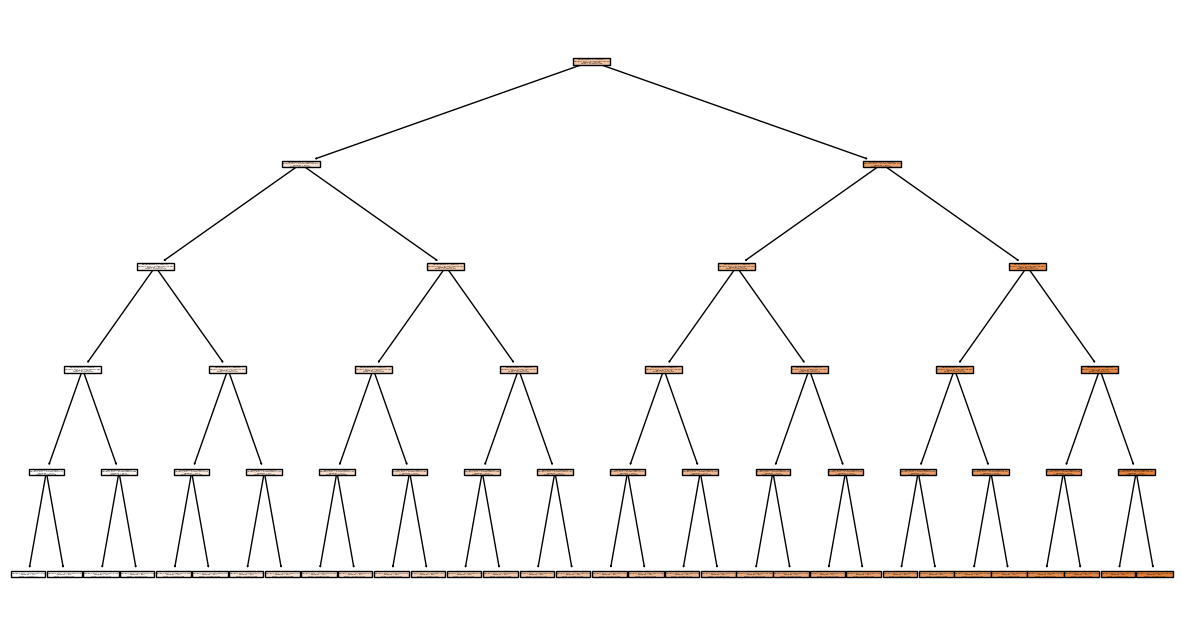

In [ ]:
# Визуализация дерева решений
plt.figure(figsize=(15, 8))
plot_tree(best_regressor_tree, filled=True, feature_names=X_train.columns)
plt.show()

# Сравнительная оценка моделей

In [ ]:
tree_metrics['type_model'] = ['tree' for i in range(6)]
tree_metrics1['type_model'] = ['tree1' for i in range(6)]
linear_model_metrics['type_model'] = ['linear' for i in range(6)]
linear_model_metrics1['type_model'] = ['linear1' for i in range(6)]


In [ ]:
df_stat = pd.concat([pd.DataFrame(tree_metrics),
                    pd.DataFrame(tree_metrics1),
                    pd.DataFrame(linear_model_metrics),
                    pd.DataFrame(linear_model_metrics1),
                    ])
df_stat

,metrics,values,type_model
0,mae_test,1.035115e+06,tree
1,mae_train,8.511019e+04,tree
2,rmse_test,1.234114e+06,tree
3,rmse_train,2.177117e+05,tree
4,r2_test,8.237725e-01,tree
5,r2_train,9.944463e-01,tree
0,mae_test,8.315551e+04,tree1
1,mae_train,8.511019e+04,tree1
2,rmse_test,1.870164e+05,tree1
3,rmse_train,2.177117e+05,tree1


# linear - линейная регрессия на обработанных данных
# linear1 - линейная регрессия на не обработанных данных
# tree - дерево решений на обработанных данных
# tree1 - дерево решений на не обработанных данных

In [ ]:
df_stat = df_stat.pivot_table(columns = 'metrics',
                            index='type_model',
                            values='values').reset_index()[['type_model', 'mae_test', 'mae_train',
                                                            'r2_test', 'rmse_test','rmse_train', 'r2_train', 'r2_test']]
df_stat

metrics,type_model,mae_test,mae_train,r2_test,rmse_test,rmse_train,r2_train,r2_test
0,linear,1.135978e+06,1.736918e+06,0.790284,1.346276e+06,2.403749e+06,0.322993,0.790284
1,linear1,1.756353e+06,1.749718e+06,0.515162,2.046995e+06,2.415301e+06,0.316470,0.515162
2,tree,1.035115e+06,8.511019e+04,0.823772,1.234114e+06,2.177117e+05,0.994446,0.823772
3,tree1,8.315551e+04,8.511019e+04,0.995953,1.870164e+05,2.177117e+05,0.994446,0.995953


In [ ]:
df_stat['dif_mae'] = round((df_stat['mae_test'] - df_stat['mae_train'])/df_stat['mae_train'],2)

df_stat['dif_rmse'] = round((df_stat['rmse_test'] - df_stat['rmse_train'])/df_stat['rmse_train'],2)


df_stat

metrics,type_model,mae_test,mae_train,r2_test,rmse_test,rmse_train,r2_train,r2_test,dif_mae,dif_rmse
0,linear,1.135978e+06,1.736918e+06,0.790284,1.346276e+06,2.403749e+06,0.322993,0.790284,-0.35,-0.44
1,linear1,1.756353e+06,1.749718e+06,0.515162,2.046995e+06,2.415301e+06,0.316470,0.515162,0.00,-0.15
2,tree,1.035115e+06,8.511019e+04,0.823772,1.234114e+06,2.177117e+05,0.994446,0.823772,11.16,4.67
3,tree1,8.315551e+04,8.511019e+04,0.995953,1.870164e+05,2.177117e+05,0.994446,0.995953,-0.02,-0.14


# Общий вывод

# Исследовались две модели - дерево решений и линейная регрессия
# Дерево Decision tree показало намного более хорошие результаты по точности по сравнению с линейной регрессией
# Причем, самый лучший результат по метрикам получился у модели "дерево решений" на не обработанных данных - то есть без всяческого масштабирования и кодирования переменных.

# Почему так? Ну, видимо я все же где то накосячила с преобразованием данных.
# А может быть для модели "дерево решений" такие преобразования и вовсе не нужны.